In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/How to get started with Drive.pdf
/content/drive/MyDrive/abalone.csv
/content/drive/MyDrive/xgboost.ipynb
/content/drive/MyDrive/seeds_dataset.csv
/content/drive/MyDrive/lungcancer.csv
/content/drive/MyDrive/banknote-authentication_csv.csv
/content/drive/MyDrive/creditcard.csv
/content/drive/MyDrive/IMDBDataset.csv
/content/drive/MyDrive/emojify.zip
/content/drive/MyDrive/yelp_labelleds.txt
/content/drive/MyDrive/amazon_cells_labelled.txt
/content/drive/MyDrive/imdb_labelled.txt
/content/drive/MyDrive/articles1.csv
/content/drive/MyDrive/Face-Mask-Detection-master.zip
/content/drive/MyDrive/face-mask-detector.zip
/content/drive/MyDrive/Face-Mask-Detection-master(2).zip
/content/drive/MyDrive/facenet_keras.h5
/content/drive/MyDrive/index.jpeg
/content/drive/MyDrive/modelNweight(1).zip
/content/drive/MyDrive/SHYAM (2).zip
/content/drive/MyDrive/face_mask_detection-master.zip
/content/drive/MyDrive/SHYAM.zip
/content/drive/MyDrive/SHYAM (1).zip
/content/drive/MyDriv

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import spacy
from tqdm.auto import tqdm
import re
import string

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
import html
import unicodedata

from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/TC/train.csv",error_bad_lines=False,engine="python")
test = pd.read_csv("/content/drive/MyDrive/TC/test.csv",error_bad_lines=False,engine="python")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 14387: unexpected end of data
Skipping line 15775: unexpected end of data


In [ ]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
14380,197398a3efca11e6,"""\n\nPakistani Language (Urdu)\nUrdu in Persia...",0,0,0,0,0,0
14381,197702d8e13970d7,wikibofh reverted 3 times.,0,0,0,0,0,0
14382,197789bf80c88999,Arjun MBT\nYou can express your opinion in the...,0,0,0,0,0,0
14383,1978221458932c64,Asimova\nHi Ymblanter! You know that I edited ...,0,0,0,0,0,0


In [ ]:
train["comment_text"][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

Sample text to visualize

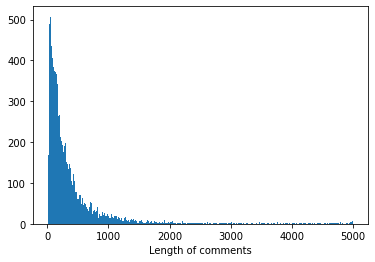

In [ ]:
sentence_lengths = [len(sentence) for sentence in train["comment_text"]]
plt.hist(sentence_lengths,500)
plt.xlabel('Length of comments')
plt.show()

In [ ]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
feature = train.drop(['id', 'comment_text'], axis=1)     ### Removed unnecessary columns - id and comment_text
counts = []                                               ### A list that contains tuple which consists of class label and number of comments for that particular class 
categories = list(feature.columns.values)
categories

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Text(0.5, 0, 'Feature Labels')

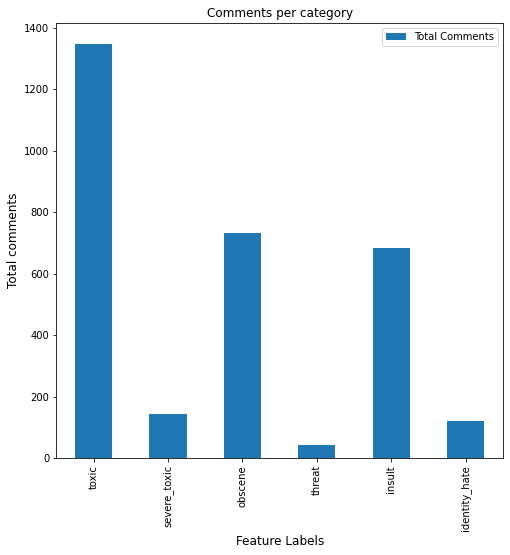

In [ ]:
for i in categories:
    counts.append((i, feature[i].sum()))
    
df_1 = pd.DataFrame(counts, columns=['Feature Labels', 'Total Comments'])   ### Dataframe made up of category and total number of comments
df_1.plot(x='Feature Labels', y='Total Comments', kind='bar',figsize=(8,8))
plt.title("Comments per category")
plt.ylabel('Total comments', fontsize=12)
plt.xlabel('Feature Labels', fontsize=12)

**Text Preprocessing**

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()

def remove_stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]

def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def clean_text( text):
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

train['comment_text'] = train['comment_text'].apply(lambda x: clean_text(x))

    

In [ ]:
train['comment_text'][1]

'daww match background colour im seemingly stick thank talk january utc'

In [ ]:
test['comment_text'] = test['comment_text'].apply(lambda x: clean_text(x))

**BoW**

In [ ]:
tok = Tokenizer(num_words=1000, oov_token='UNK')
tok.fit_on_texts(train['comment_text'] )
# Extract binary BoW features
x_train = tok.texts_to_sequences(train['comment_text'])
x_test = tok.texts_to_sequences(test['comment_text'])

vocab_size = len(tok.word_index) + 1
vocab_size

37030

**LSTM**

In [ ]:
maxlen = max([len(t) for t in x_train])
maxlen

1001

In [ ]:
len(x_train[0])

26

In [ ]:
train['comment_text'][0]

'explanation edit make username hardcore metallica fan revert werent vandalism closure gas vote new york doll fac please dont remove template talk page since im retire'

In [ ]:
x_train[0]

[413,
 4,
 8,
 499,
 1,
 1,
 286,
 69,
 1,
 152,
 1,
 1,
 456,
 67,
 1,
 1,
 1,
 12,
 15,
 40,
 262,
 7,
 3,
 79,
 23,
 1]

In [ ]:
train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']].sum()

toxic            1348
severe_toxic      144
obscene           732
threat             43
insult            683
identity_hate     120
dtype: int64

In [ ]:
training_padded = pad_sequences(x_train,
                                maxlen=50, 
                                truncating='post', 
                                padding='post'
                               )
test_padded = pad_sequences(x_test,
                            maxlen=50, 
                            truncating='post', 
                            padding='post'
                               )

In [ ]:
training_padded[0]

array([413,   4,   8, 499,   1,   1, 286,  69,   1, 152,   1,   1, 456,
        67,   1,   1,   1,  12,  15,  40, 262,   7,   3,  79,  23,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 128, input_length=50))
model.add(layers.LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))



model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           4739840   
                                                                 
 lstm (LSTM)                 (None, 50, 512)           1312768   
                                                                 
 lstm_1 (LSTM)               (None, 128)               328192    
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 6,382,966
Trainable params: 6,382,966
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(training_padded,
                     train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']],
                    epochs=5,
                    batch_size=512,
                   validation_split=0.2)

Epoch 1/5
23/23 [==============================] - 196s 8s/step - loss: 0.2550 - accuracy: 0.6403 - val_loss: 0.1299 - val_accuracy: 0.9958
Epoch 2/5
23/23 [==============================] - 181s 8s/step - loss: 0.1409 - accuracy: 0.9945 - val_loss: 0.1294 - val_accuracy: 0.9958
Epoch 3/5
23/23 [==============================] - 178s 8s/step - loss: 0.1404 - accuracy: 0.9945 - val_loss: 0.1294 - val_accuracy: 0.9958
Epoch 4/5
23/23 [==============================] - 183s 8s/step - loss: 0.1404 - accuracy: 0.9945 - val_loss: 0.1293 - val_accuracy: 0.9958
Epoch 5/5
23/23 [==============================] - 179s 8s/step - loss: 0.1403 - accuracy: 0.9945 - val_loss: 0.1292 - val_accuracy: 0.9958


In [ ]:
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

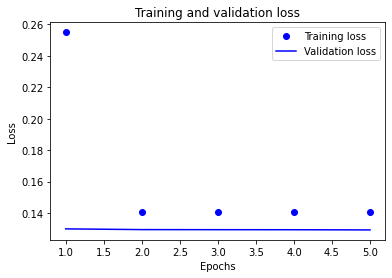

In [ ]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

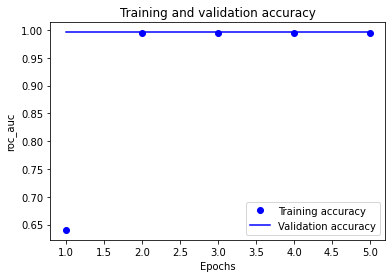

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('roc_auc')
plt.legend()

plt.show()

In [ ]:
preds = model.predict(test_padded)
preds

493/493 [==============================] - 151s 304ms/step


array([[0.09289158, 0.01003012, 0.05152996, 0.00258932, 0.04888925,
        0.00867581],
       [0.09289148, 0.01003013, 0.05153002, 0.00258932, 0.04888928,
        0.00867579],
       [0.09289148, 0.01003013, 0.05153002, 0.00258932, 0.04888928,
        0.00867579],
       ...,
       [0.09289169, 0.01002857, 0.05151942, 0.00258924, 0.04889888,
        0.00867527],
       [0.09289148, 0.01003013, 0.05153002, 0.00258932, 0.04888928,
        0.00867579],
       [0.09289147, 0.01003013, 0.05153001, 0.00258932, 0.04888928,
        0.00867579]], dtype=float32)

In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland —
3,00017563c3f7919a,look back source information update correct fo...
4,00017695ad8997eb,dont anonymously edit article


In [ ]:
final = pd.DataFrame()
columns = ['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']
final['id'] = test['id']
final[columns] = preds

In [ ]:
final.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.092892,0.01003,0.05153,0.002589,0.048889,0.008676
1,0000247867823ef7,0.092891,0.01003,0.05153,0.002589,0.048889,0.008676
2,00013b17ad220c46,0.092891,0.01003,0.05153,0.002589,0.048889,0.008676
3,00017563c3f7919a,0.092891,0.01003,0.05153,0.002589,0.048889,0.008676
4,00017695ad8997eb,0.092891,0.01003,0.05153,0.002589,0.048889,0.008676


In [ ]:


model.save('tox_model.h5')